In [4]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import argparse

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'pc_connectivity_ratio_210101_max_dist_1500'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData



# ap = argparse.ArgumentParser()
# ap.add_argument("--max_dist", type=int, default=200)
# ap.add_argument("--threshold", type=int, default=100)
# config = ap.parse_args()
config_max_dist = 1500
config_threshold = 1000



from weight_database import WeightDatabase
weightdb = WeightDatabase()

# weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_201224_setup01_syndb_threshold_10_coalesced.gz')
weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_210101_setup01_syndb_threshold_10_coalesced_filtered_10.gz')
weightdb.load_touch_db(
    '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/purkinje/db_pf_contacts_201224.gz',
    max_dist=config_max_dist
    )


postsyns = weightdb.get_postsyn_ids()



mpd = MyPlotData()

n = 0
for postsyn in postsyns:
    n_total = len(weightdb.get_total_connections(postsyn))
    n_connected = len(weightdb.get_connections(postsyn))
    if n_total >= config_threshold:
        ratio = n_connected/n_total*100
        print(postsyn)
        print(f'n_total: {n_total}', end=', ')
        print(f'n_connected: {n_connected}', end=', ')
        print(f'ratio: {ratio}', end=', ')
        print()
        n += 1
        mpd.add_data_point(
            ratio=ratio,
            )
print(f'Num samples: {n}')


pc_7
n_total: 1141, n_connected: 432, ratio: 37.86152497808939, 
pc_21
n_total: 1052, n_connected: 525, ratio: 49.90494296577947, 
purkinje_0
n_total: 2329, n_connected: 1034, ratio: 44.39673679690854, 
pc_28
n_total: 3337, n_connected: 1264, ratio: 37.87833383278394, 
pc_9
n_total: 3340, n_connected: 1443, ratio: 43.203592814371255, 
pc_18
n_total: 2164, n_connected: 854, ratio: 39.46395563770795, 
pc_27
n_total: 1155, n_connected: 359, ratio: 31.082251082251084, 
pc_4
n_total: 1350, n_connected: 665, ratio: 49.25925925925926, 
pc_32
n_total: 2033, n_connected: 820, ratio: 40.33448106246926, 
pc_1
n_total: 1707, n_connected: 721, ratio: 42.23784417106034, 
pc_15
n_total: 3331, n_connected: 1425, ratio: 42.77994596217352, 
pc_16
n_total: 3089, n_connected: 1321, ratio: 42.76464875364196, 
pc_19
n_total: 2335, n_connected: 992, ratio: 42.48394004282655, 
pc_50
n_total: 1105, n_connected: 472, ratio: 42.71493212669683, 
pc_17
n_total: 1716, n_connected: 721, ratio: 42.01631701631702, 
pu

Height: 4, Aspect: 0.625


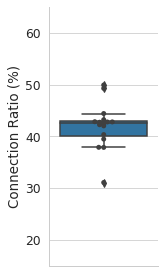

In [6]:

importlib.reload(my_plot); my_plot.my_catplot(
    mpd,
    # x="num_syns_per_connection",
    y="ratio",
    # hue="type",
    # hue_order=['All', 'Per PC', 'Per pf'],
    # hue_order=['All', 'Per PC'],
    ylim=[15, 65],
    context='paper',
    kind='box',
    add_swarm=True,
    # font_scale=1.5,
    height=4,
    width=2.5,
    y_axis_label='Connection Ratio (%)',
    # x_axis_label='# of synapses per connection',
    save_filename=f'{script_n}_max_dist_{config_max_dist}_threshold_{config_threshold}.svg',
    show=True,
    )